In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_json("/content/data/train.jsonl",lines=True)
df2=pd.read_json("/content/data/dev.jsonl",lines=True)

In [ ]:
from PIL import Image
train_imglabel0=[]
train_imglabel1=[]
for i in range(len(df)):
  if(df.label[i]==1):
    train_imglabel0.append(Image.open('/content/data/'+df.img[i]).resize((224,224)).convert('LA'))
  else:
    train_imglabel1.append(Image.open('/content/data/'+df.img[i]).resize((224,224)).convert('LA'))


In [ ]:
from PIL import Image
val_imglabel0=[]
val_imglabel1=[]
for i in range(len(df2)):
  if(df2.label[i]==1):
    val_imglabel0.append(Image.open('/content/data/'+df2.img[i]).resize((224,224)).convert('LA'))
  else:
    val_imglabel1.append(Image.open('/content/data/'+df2.img[i]).resize((224,224)).convert('LA'))


In [ ]:
"""fig = plt.gcf()
fig.set_size_inches(20, 20)

for i in range(20):
  plt.subplot(5,4, i + 1)
  plt.imshow(train_imglabel0[i])
plt.show()
"""


'fig = plt.gcf()\nfig.set_size_inches(20, 20)\n\nfor i in range(20):\n  plt.subplot(5,4, i + 1)\n  plt.imshow(train_imglabel0[i])\nplt.show()\n'

In [ ]:
"""fig = plt.gcf()
fig.set_size_inches(20, 20)

for i in range(20):
  plt.subplot(5,4, i + 1)
  plt.imshow(train_imglabel1[i])
plt.show()
"""


'fig = plt.gcf()\nfig.set_size_inches(20, 20)\n\nfor i in range(20):\n  plt.subplot(5,4, i + 1)\n  plt.imshow(train_imglabel1[i])\nplt.show()\n'

In [ ]:
!mkdir memes
!mkdir memes/good
!mkdir memes/bad
!mkdir valmemes
!mkdir valmemes/good
!mkdir valmemes/bad

In [ ]:
for i in range(len(train_imglabel1)):
  train_imglabel1[i].save("/content/memes/good/img"+str(datetime.now())+".png")


In [ ]:
for i in range(len(train_imglabel0)):
  train_imglabel0[i].save("/content/memes/bad/img"+str(datetime.now())+".png")


In [ ]:
for i in range(len(val_imglabel1)):
  val_imglabel1[i].save("/content/valmemes/good/img"+str(datetime.now())+".png")
for i in range(len(val_imglabel0)):
  val_imglabel0[i].save("/content/valmemes/bad/img"+str(datetime.now())+".png")


In [ ]:
val_y=df2.label
#train_images=df.img
val_images=df2.img
#train_y=df.label


In [ ]:
"""from PIL import Image
train_img=[]
for i in range(len(train_images)):
  train_img.append(Image.open('/content/data/'+train_images[i]).resize((224,224)).convert('LA'))
"""

"from PIL import Image\ntrain_img=[]\nfor i in range(len(train_images)):\n  train_img.append(Image.open('/content/data/'+train_images[i]).resize((224,224)).convert('LA'))\n"

In [ ]:
"""val_img=[]
for i in range(len(val_images)):
  val_img.append(Image.open('/content/data/'+val_images[i]).resize((224,224)).convert('LA'))
"""


"val_img=[]\nfor i in range(len(val_images)):\n  val_img.append(Image.open('/content/data/'+val_images[i]).resize((224,224)).convert('LA'))\n"

In [ ]:
"""val_flat=[]
for i in range(len(val_images)):
  val_flat.append(np.asanyarray(val_img[i]).flatten()/255)
  """

'val_flat=[]\nfor i in range(len(val_images)):\n  val_flat.append(np.asanyarray(val_img[i]).flatten()/255)\n  '

In [ ]:
"""train_flat=[]
for i in range(len(train_images)):
  train_flat.append(np.asanyarray(train_img[i]).flatten()/255)
  """

'train_flat=[]\nfor i in range(len(train_images)):\n  train_flat.append(np.asanyarray(train_img[i]).flatten()/255)\n  '

In [ ]:
"""train_flat=train_flat[:10]
val_flat=val_flat[:10]
train_y=train_y[:10]
val_y=val_y[:10]
"""

'train_flat=train_flat[:10]\nval_flat=val_flat[:10]\ntrain_y=train_y[:10]\nval_y=val_y[:10]\n'

In [ ]:
"""from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
model2 = DecisionTreeClassifier(random_state=0)
model2.fit(train_flat, train_y)
val_predictions = model2.predict(val_flat)
val_mae1 = mean_absolute_error(val_predictions, val_y)
print(val_mae1)
from sklearn.metrics import accuracy_score
print(accuracy_score(val_y, val_predictions))
"""

'from sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import mean_absolute_error\nmodel2 = DecisionTreeClassifier(random_state=0)\nmodel2.fit(train_flat, train_y)\nval_predictions = model2.predict(val_flat)\nval_mae1 = mean_absolute_error(val_predictions, val_y)\nprint(val_mae1)\nfrom sklearn.metrics import accuracy_score\nprint(accuracy_score(val_y, val_predictions))\n'

In [ ]:
"""import lightgbm as lgb
clf = lgb.LGBMClassifier(verbose=1)
clf.fit(train_flat, train_y)
lgbpredictions=clf.predict(val_flat)
from sklearn.metrics import accuracy_score
print(accuracy_score(val_y, lgbpredictions))
"""

'import lightgbm as lgb\nclf = lgb.LGBMClassifier(verbose=1)\nclf.fit(train_flat, train_y)\nlgbpredictions=clf.predict(val_flat)\nfrom sklearn.metrics import accuracy_score\nprint(accuracy_score(val_y, lgbpredictions))\n'

In [ ]:
"""model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_img, train_y, epochs=5)
model.evaluate(val_img, val_y)
"""

"model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), \n                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), \n                                    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])\nmodel.compile(optimizer = tf.optimizers.Adam(),\n              loss = 'sparse_categorical_crossentropy',\n              metrics=['accuracy'])\n\nmodel.fit(train_img, train_y, epochs=5)\nmodel.evaluate(val_img, val_y)\n"

In [ ]:
"""classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])
"""

'classifications = model.predict(test_images)\n\nprint(classifications[0])\nprint(test_labels[0])\n'

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
import os
import shutil

os.listdir("/content/memes") #First find where the ".ipynb_checkpoints" is located.



['good', 'bad']

In [ ]:
shutil.rmtree("/content/valmemes/.ipynb_checkpoints") 
shutil.rmtree("/content/memes/.ipynb_checkpoints") 
#shutil.rmtree("/content/memes/la") 

FileNotFoundError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/memes/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
        '/content/valmemes/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 8500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,  
      epochs=5,
      validation_data = validation_generator,

      verbose=1)

Epoch 1/5
67/67 [==============================] - 28s 412ms/step - loss: 0.7243 - accuracy: 0.6355 - val_loss: 0.7491 - val_accuracy: 0.5000
Epoch 2/5
67/67 [==============================] - 26s 382ms/step - loss: 0.6521 - accuracy: 0.6431 - val_loss: 0.7383 - val_accuracy: 0.5200
Epoch 3/5
67/67 [==============================] - 26s 383ms/step - loss: 0.6407 - accuracy: 0.6441 - val_loss: 0.7440 - val_accuracy: 0.5040
Epoch 4/5
67/67 [==============================] - 26s 383ms/step - loss: 0.6354 - accuracy: 0.6495 - val_loss: 0.7704 - val_accuracy: 0.4960
Epoch 5/5
67/67 [==============================] - 26s 383ms/step - loss: 0.6282 - accuracy: 0.6544 - val_loss: 0.8117 - val_accuracy: 0.5080


In [ ]:
"""import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " 1")
  else:
    print(fn + " 0")
""" 

'import numpy as np\nfrom google.colab import files\nfrom keras.preprocessing import image\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n \n  # predicting images\n  path = \'/content/\' + fn\n  img = image.load_img(path, target_size=(300, 300))\n  x = image.img_to_array(img)\n  x = np.expand_dims(x, axis=0)\n\n  images = np.vstack([x])\n  classes = model.predict(images, batch_size=10)\n  print(classes[0])\n  if classes[0]>0.5:\n    print(fn + " 1")\n  else:\n    print(fn + " 0")\n'

In [ ]:
"""import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    """

"import numpy as np\nimport random\nfrom tensorflow.keras.preprocessing.image import img_to_array, load_img\n\n# Let's define a new Model that will take an image as input, and will output\n# intermediate representations for all layers in the previous model after\n# the first.\nsuccessive_outputs = [layer.output for layer in model.layers[1:]]\n#visualization_model = Model(img_input, successive_outputs)\nvisualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)\n# Let's prepare a random input image from the training set.\nhorse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]\nhuman_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]\nimg_path = random.choice(horse_img_files + human_img_files)\n\nimg = load_img(img_path, target_size=(300, 300))  # this is a PIL image\nx = img_to_array(img)  # Numpy array with shape (150, 150, 3)\nx = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)\n\

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

training_sentences = df.text
testing_sentences = df2.text
training_labels = df.label
testing_labels = df2.label
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),

    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

num_epochs = 20
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
history = model2.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 120, 64)           12544     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 97,713
Trainable params: 97,713
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
266/266 [==============================] - 7s 27ms/step - loss: 0.6368 - accuracy: 0.6566 - val_loss: 0.7

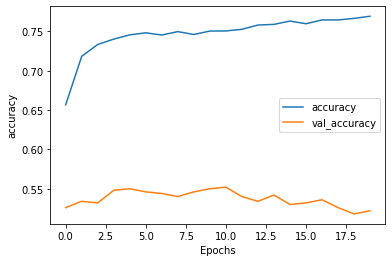

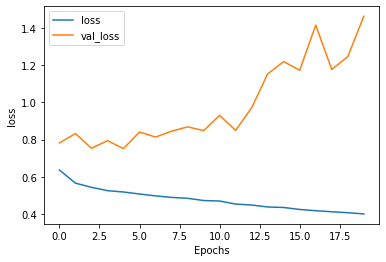

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

its their <OOV> not their color that <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
putting bows on your pet


NameError: ignored

In [ ]:
sentence = ["lets go beat up lesbians", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model2.predict(padded))

In [ ]:
df3=pd.read_json("/content/data/test.jsonl",lines=True)

In [ ]:
df3

In [ ]:
from PIL import Image
test=[]

for i in range(len(df3)):
  test.append(Image.open('/content/data/'+df3.img[i]).resize((300,300)))
  

In [ ]:
testlabel=[]
for i in range(len(df3)):
  testlabel.append(df3.text[i])

In [ ]:


sequences = tokenizer.texts_to_sequences(testlabel)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
label1 = model2.predict(padded)
#label1.append(classes)
  

In [ ]:
label1[2][0]

In [ ]:
from keras.preprocessing import image


for i in range(len(df3)):
  x = image.img_to_array(test[i])
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  label2.append(model.predict(images, batch_size=10))
#label2.append(classes)
  

In [ ]:
label2[2][0][0]

In [ ]:
label=[]
prob=[]
for i in range(len(df3)):
  prob.append(label1[i][0]*0.75+label2[i][0][0]*0.25)

for i in range(len(df3)):
   if(prob[i]>0.5):
    label.append(1)
   else:
    label.append(0)

In [ ]:
label[0]

In [ ]:
prob[0]

In [ ]:

output = pd.DataFrame({'id': df3.id,'proba':prob,'label': label})
output.to_csv('submission.csv', index=False)